In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio
import matplotlib as mpl
from matplotlib import colors
import matplotlib.pyplot as plt
from toolz.curried import pipe, curry

In [4]:
#Configure Visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
mpl.rcParams[ 'figure.figsize' ] = 8 , 6
mpl.rcParams.update({'font.size': 14})

# Haldoupis

In [16]:
df = pd.read_csv("properties/haldoupis/haldoupis_iza.csv", index_col="REFCODE")
df.head(5)

LCD    PLD       volume  Kh(molec./uc*atm) CH4  Kh(mmol/gratm) CH4  \
REFCODE                                                                         
ABW      4.130  3.434   454.923947               0.238904            0.497018   
ACO      4.518  3.495   971.769893               0.929562            0.966936   
AEI      7.247  3.661  3189.362594               1.642375            0.569469   
AEL      5.566  4.540  2084.805600               1.464660            0.609418   
AEN      4.323  3.465  2384.731782               1.234628            0.428088   

         Global_enermax(kJ/mol)CH4  enermaxKJ/mol)CH4  Enermin(kJ/mol)CH4  \
REFCODE                                                                     
ABW                      -9.976758         -11.659779          -21.984804   
ACO                     -11.066168         -11.937169          -21.028564   
AEI                      -8.661541         -11.925002          -17.611090   
AEL                     -16.190395         -16.854727          -19.288824   
AEN                     -10.760774         -15.709833          -22.455557   

         Ener_dif(kJ/mol)CH4  Kh(molec./uc*atm)H2  Kh(mmol/gratm)H2  \
REFCODE                                                               
ABW                10.325025             0.011294          0.023497   
ACO                 9.091395             0.028491          0.029636   
AEI                 5.686089             0.080174          0.027799   
AEL                 2.434099             0.027994          0.011648   
AEN                 6.745723             0.043625          0.015126   

         Global_enermax(kJ/mol)H2  enermaxKJ/mol)H2  Enermin(kJ/mol)H2  \
REFCODE                                                                  
ABW                     -6.127484         -6.187618          -7.195485   
ACO                     -5.370616         -5.844027          -6.074747   
AEI                     -1.713921         -4.090216          -5.826277   
AEL                     -3.459712         -3.762083          -4.694370   
AEN                     -5.881532         -6.025570          -7.246639   

         Ener_dif(kJ/mol)H2  
REFCODE                      
ABW                1.007867  
ACO                0.230720  
AEI                1.736061  
AEL                0.932286  
AEN                1.221069

In [6]:
df.describe()

LCD         PLD        volume  Kh(molec./uc*atm) CH4  \
count  189.000000  189.000000    189.000000           1.890000e+02   
mean     6.750344    4.567058   3683.705538           2.736770e+00   
std      2.158984    1.667896   5298.099533           5.954128e+00   
min      3.124000    1.328000    307.484341           1.000000e-07   
25%      5.314000    3.445000   1398.579361           8.768266e-01   
50%      6.300000    4.120000   2140.883743           1.472190e+00   
75%      7.670000    5.895000   4052.020576           2.663819e+00   
max     16.390000   11.333000  45201.713462           6.137586e+01   

       Kh(mmol/gratm) CH4  Global_enermax(kJ/mol)CH4  enermaxKJ/mol)CH4  \
count        1.890000e+02                 189.000000         189.000000   
mean         7.260728e-01                 481.477141         476.324564   
std          5.780613e-01                6047.370581        6047.385989   
min          1.000000e-07                 -19.294628         -19.763836   
25%          4.196133e-01                 -11.963975         -13.439651   
50%          5.909949e-01                  -7.703146          -9.519754   
75%          9.342473e-01                  -3.137358          -4.864193   
max          4.406606e+00               83144.695312       83144.695312   

       Enermin(kJ/mol)CH4  Ener_dif(kJ/mol)CH4  Kh(molec./uc*atm)H2  \
count          189.000000           189.000000           189.000000   
mean           -15.936781           492.261382             0.080232   
std              5.898466          6047.901015             0.128637   
min            -26.403608             0.018822             0.004410   
25%            -20.342293             1.764514             0.027994   
50%            -17.444161             4.042136             0.047964   
75%            -11.638591            11.209843             0.090943   
max             11.176474         83167.578125             1.137517   

       Kh(mmol/gratm)H2  Global_enermax(kJ/mol)H2  enermaxKJ/mol)H2  \
count        189.000000                189.000000        189.000000   
mean           0.021349                439.081559        438.376673   
std            0.005717               6047.953527       6048.004517   
min            0.003205                 -6.302641         -6.457626   
25%            0.017872                 -3.579876         -4.728830   
50%            0.021329                 -2.002944         -2.838799   
75%            0.025591                 -1.143738         -1.464560   
max            0.048816              83144.695312      83144.695312   

       Enermin(kJ/mol)H2  Ener_dif(kJ/mol)H2  
count         189.000000          189.000000  
mean           -4.571127          442.947842  
std             2.129500         6048.185024  
min            -9.220568            0.003713  
25%            -6.418929            0.414645  
50%            -4.912537            0.932286  
75%            -2.410496            1.718688  
max            -0.440226        83151.726562

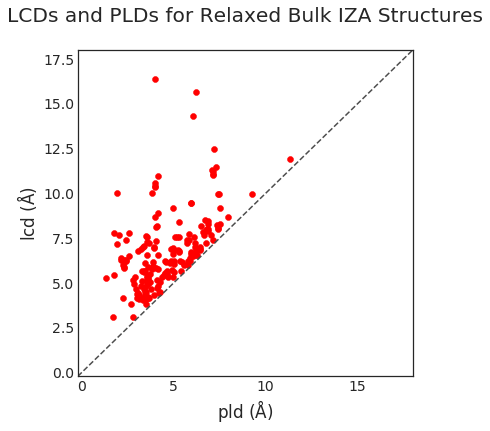

In [7]:
l1 = np.array(df["PLD"])
l2 = np.array(df["LCD"])

plt.figure(figsize=(6, 6))
plt.scatter(l1, l2, c="r")
plt.title("LCDs and PLDs for Relaxed Bulk IZA Structures\n")
plt.xlabel("pld $(\mathrm{\AA})$")
plt.ylabel("lcd $(\mathrm{\AA})$")
plt.xlim([-0.2, 18.0])
plt.ylim([-0.2, 18.0])
plt.plot([-0.2, 18.0], [-0.2, 18.0], ls="--", c=".3")
plt.show()

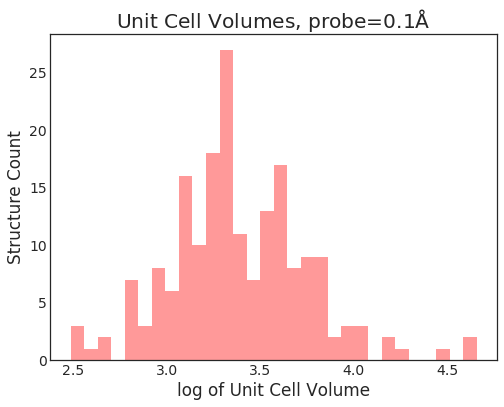

In [8]:
l = df["volume"]
l[np.isnan(l)] = 0
sns.distplot(np.log10(l), bins=30, kde=False, color="r")
plt.title("Unit Cell Volumes, probe=0.1$\mathrm{\AA}$")
plt.xlabel("log of Unit Cell Volume")
plt.ylabel("Structure Count")
plt.show()

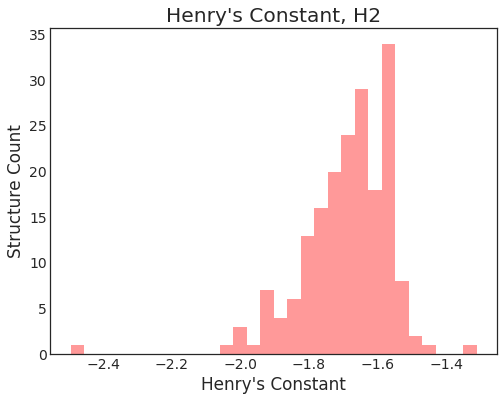

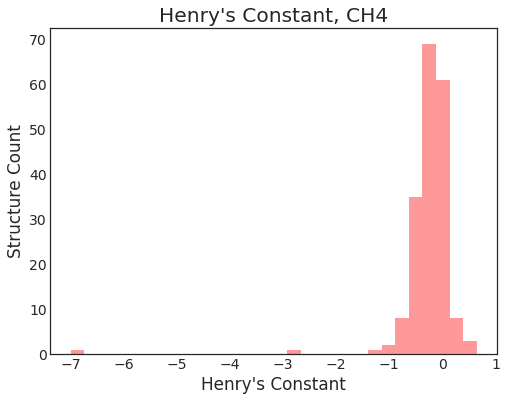

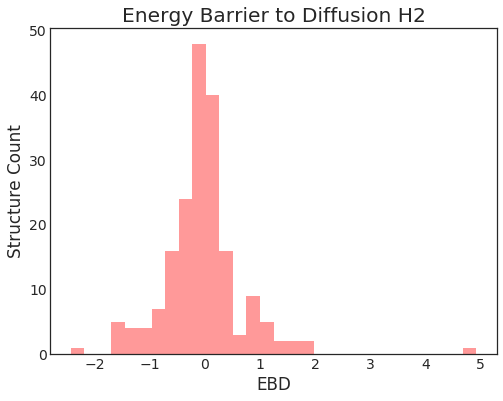

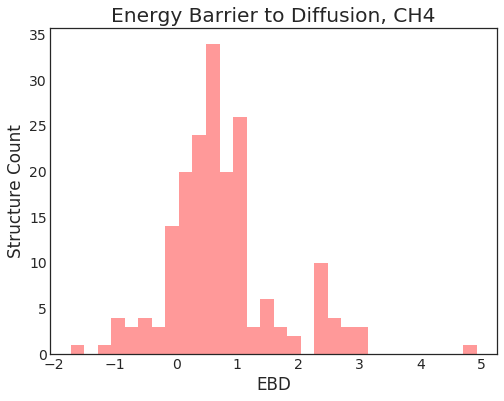

In [20]:
l = df["Kh(mmol/gratm)H2"]
l[np.isnan(l)] = 0
sns.distplot(np.log10(l), bins=30, kde=False, color="r")
plt.title("Henry's Constant, H2")
plt.xlabel("Henry's Constant")
plt.ylabel("Structure Count")
plt.show()

l = df["Kh(mmol/gratm) CH4"]
l[np.isnan(l)] = 0
sns.distplot(np.log10(l), bins=30, kde=False, color="r")
plt.title("Henry's Constant, CH4")
plt.xlabel("Henry's Constant")
plt.ylabel("Structure Count")
plt.show()



l = df["Ener_dif(kJ/mol)H2"]
l[np.isnan(l)] = 0
sns.distplot(np.log10(l), bins=30, kde=False, color="r")
plt.title("Energy Barrier to Diffusion H2")
plt.xlabel("EBD")
plt.ylabel("Structure Count")
plt.show()

l = df["Ener_dif(kJ/mol)CH4"]
l[np.isnan(l)] = 0
sns.distplot(np.log10(l), bins=30, kde=False, color="r")
plt.title("Energy Barrier to Diffusion, CH4")
plt.xlabel("EBD")
plt.ylabel("Structure Count")
plt.show()

Correlation: 0.082


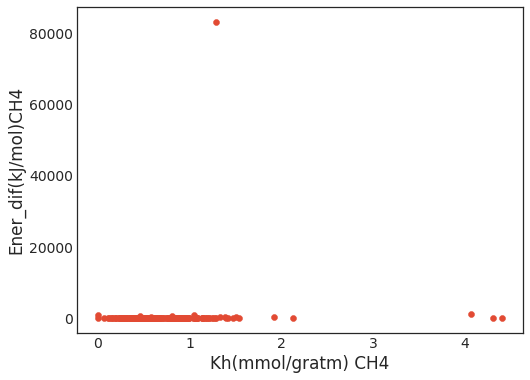

Correlation: 0.269


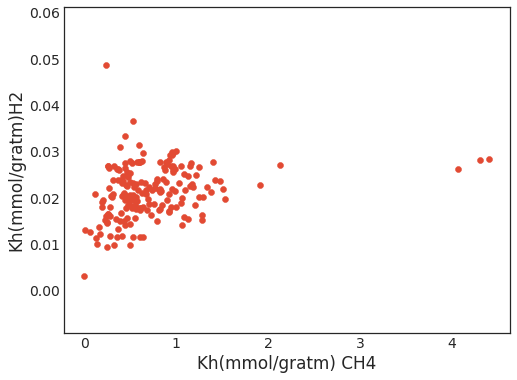

Correlation: 0.071


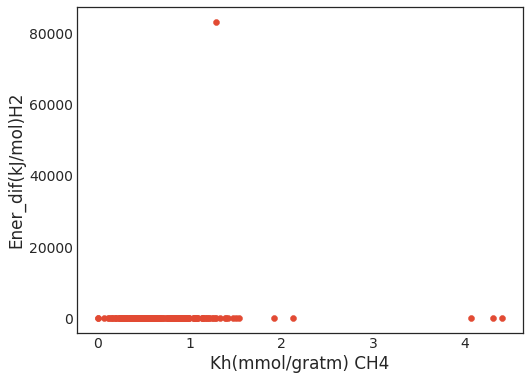

Correlation: -0.065


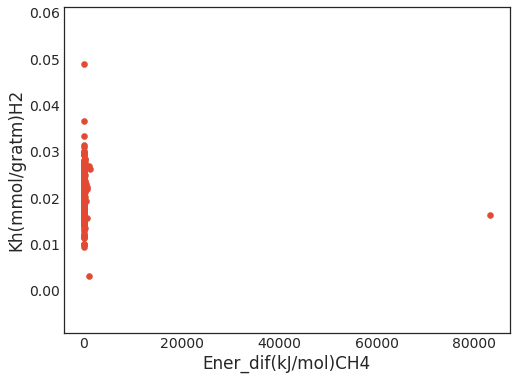

Correlation: 1.000


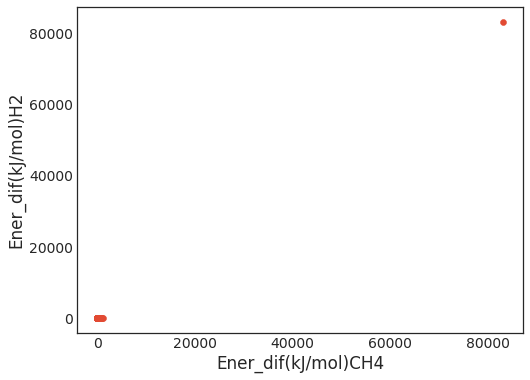

Correlation: -0.064


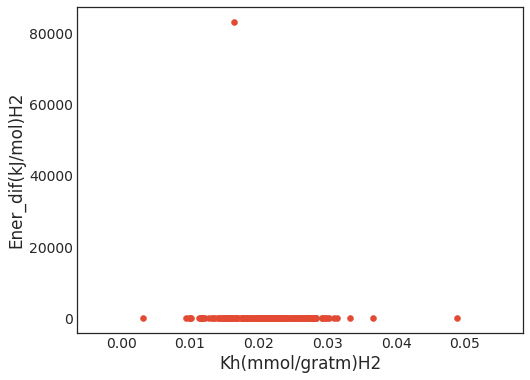

In [9]:
cols = ['Kh(mmol/gratm) CH4', 'Ener_dif(kJ/mol)CH4', 'Kh(mmol/gratm)H2', 'Ener_dif(kJ/mol)H2']

idx_x = "Kh(mmol/gratm) CH4"
idx_y = "Ener_dif(kJ/mol)CH4"

for i, idx_x in enumerate(cols):
    for j, idx_y in enumerate(cols):
        if j > i:            
            print("Correlation: %1.3f" % (np.corrcoef(df[idx_x], df[idx_y])[0,1]))

            plt.scatter(df[idx_x], df[idx_y])
            plt.xlabel(idx_x)
            plt.ylabel(idx_y)
            plt.show()

In [10]:
cols = ['Kh(mmol/gratm) CH4', 'Ener_dif(kJ/mol)CH4', 'Kh(mmol/gratm)H2', 'Ener_dif(kJ/mol)H2']
df[cols].to_csv("csv/hal.csv")

# DFT

In [11]:
df = pd.read_csv("properties/dft_linkage/dft_iza.csv", index_col="name")
df.head(5)

density  spg     volume  SiOSi_average  SiOSi_gmean  SiOSi_hmean  \
name                                                                      
ABW   1.754532   74  18.955164     160.740416   160.343937   159.964020   
ACO   1.642732  229  20.245206     156.295856   155.733278   155.207553   
AEI   1.501576   63  22.148351     149.121203   149.110812   149.100401   
AEL   1.914276   74  17.373380     151.484472   151.059147   150.650430   
AEN   2.008222   64  16.560637     150.758467   150.162547   149.581048   

       SiOSi_max  SiOSi_mean   SiOSi_min  SiOSi_skew    ...      NAV  VolFrac  \
name                                                    ...                     
ABW   180.000000  160.740416  149.408305    0.910065    ...      0.0  0.02144   
ACO   180.000000  156.295856  148.394474    1.154701    ...      0.0  0.04092   
AEI   151.266151  149.121203  146.100526   -0.251464    ...      0.0  0.13668   
AEL   180.000000  151.484472  137.523964    0.900939    ...      0.0  0.04850   
AEN   180.000000  150.758467  128.216395    0.563418    ...      0.0  0.01940   

      largest_free_sphere  largest_included_sphere  \
name                                                 
ABW               3.10046                  3.61163   
ACO               3.15967                  3.91932   
AEI               3.44131                  6.90319   
AEL               4.07159                  5.22554   
AEN               3.18878                  3.90726   

      largest_included_sphere_free  max_dim  min_dim  mode_dim      g_gbr  \
name                                                                        
ABW                        3.61163        1        1       [1]  42.398400   
ACO                        3.91754        3        3       [3]  31.407661   
AEI                        6.90319        3        3       [3]  25.204138   
AEL                        5.22554        1        1       [1]  28.799694   
AEN                        3.90265        2        2       [2]  29.565964   

          k_gbr  
name             
ABW   89.876943  
ACO   90.180304  
AEI   50.301074  
AEL   65.150594  
AEN   52.712137  

[5 rows x 34 columns]

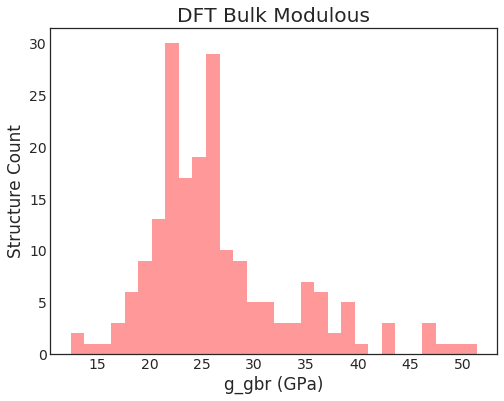

In [12]:
l = df["g_gbr"]
l[np.isnan(l)] = 0
sns.distplot(l, bins=30, kde=False, color="r")
plt.title("DFT Bulk Modulous")
plt.xlabel("g_gbr (GPa)")
plt.ylabel("Structure Count")
plt.show()

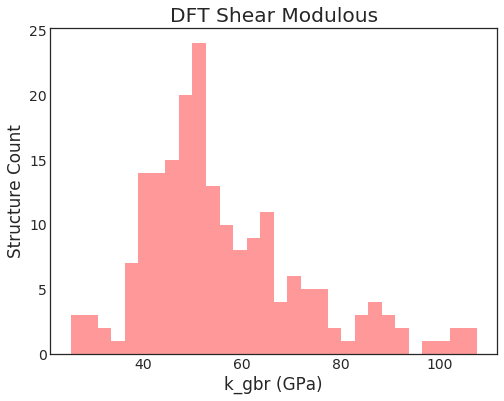

In [13]:
l = df["k_gbr"]
l[np.isnan(l)] = 0
sns.distplot(l, bins=30, kde=False, color="r")
plt.title("DFT Shear Modulous")
plt.xlabel("k_gbr (GPa)")
plt.ylabel("Structure Count")
plt.show()

Correlation: 0.872


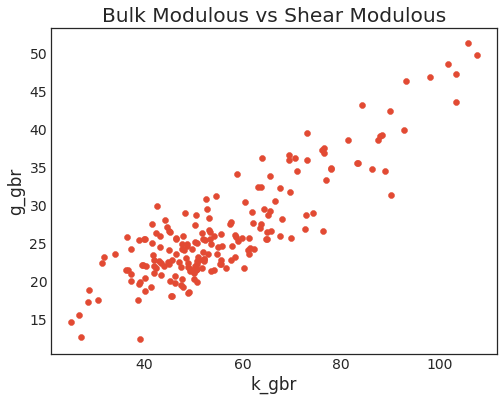

In [14]:
print("Correlation: %1.3f" % (np.corrcoef(df["k_gbr"], df["g_gbr"])[0,1]))

plt.scatter(df["k_gbr"], df["g_gbr"])
plt.xlabel("k_gbr")
plt.ylabel("g_gbr")
plt.title("Bulk Modulous vs Shear Modulous")
plt.show()

In [15]:
cols = ["g_gbr", "k_gbr"]
df[cols].to_csv("csv/dft.csv")